<a href="https://colab.research.google.com/github/jooyeongkang/kaggle-chest-x-ray-images-pneumonia/blob/master/ChestXRay_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import libraries

In [170]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [171]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load data

## Jooyeong's Path

In [173]:
# Train Data
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

## Jin's Path

In [174]:
"""# Train Data _Jin's data
dir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)
# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)"""

"# Train Data _Jin's data\ndir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'\ndir_dt_train = pathlib.Path(dir_dt_train)\n# Validation Data(merged to the train data due to the small amount of validation data)\n#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'\n#dir_dt_val = pathlib.Path(dir_dt_val)\n\n# Test Data\ndir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'\ndir_dt_test = pathlib.Path(dir_dt_test)"

In [175]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

"# Train Data\ndir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'\ndir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'\ndir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)\ndir_dt_train_normal = pathlib.Path(dir_dt_train_normal)\n\ndt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))\ndt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))\n\nimg_cnt_train_pneumonia = len(dt_train_pneumonia)\nimg_cnt_train_normal = len(dt_train_normal)\n\nprint('Training Data')\nprint('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))\n\n\n# Validation Data\ndir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'\ndir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'\ndir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)\ndir_dt_val_normal = pathlib.Path(dir_dt_val_normal)\n\ndt_val_pneumonia = list(dir_dt_val_

# Create a dataset

## Define parameters

In [176]:
batch_size = 32   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

### Reference
**tf.keras.preprocessing.image_dataset_from_directory**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [177]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training'
)

Found 5232 files belonging to 2 classes.
Using 4186 files for training.


In [178]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation'
  )

Found 5232 files belonging to 2 classes.
Using 1046 files for validation.


In [179]:
num_class = len(dt_train.class_names)

# Visualize the data

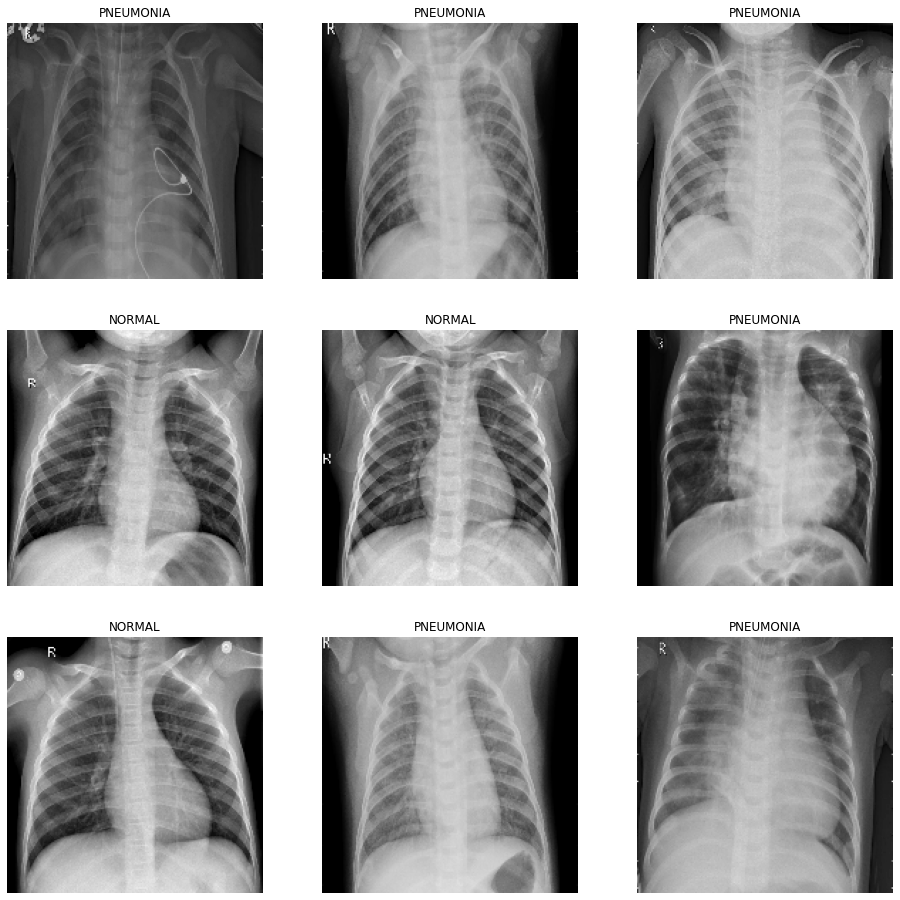

In [180]:
plt.figure(figsize=(16, 16))

for images, labels in dt_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

## Check Data Structure

### Reference
**tf.data.Dataset**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [181]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32,)


## Examples of Data Augmentation

### RandomFlip

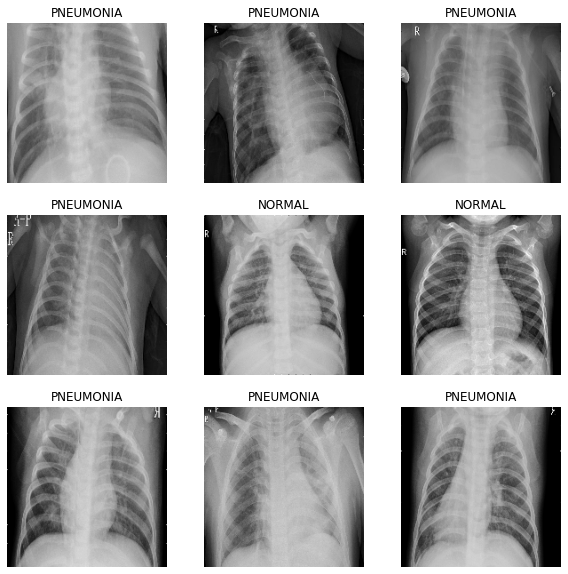

In [182]:
dt_augm_filp = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal")
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_filp(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomRotation

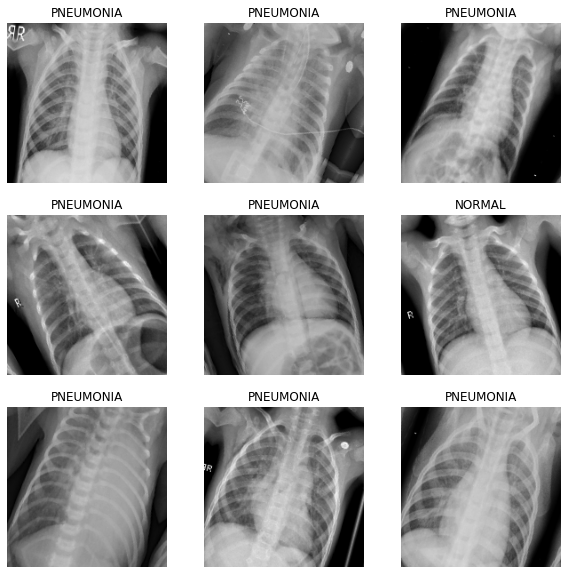

In [183]:
dt_augm_rotation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.1)
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_rotation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomZoom

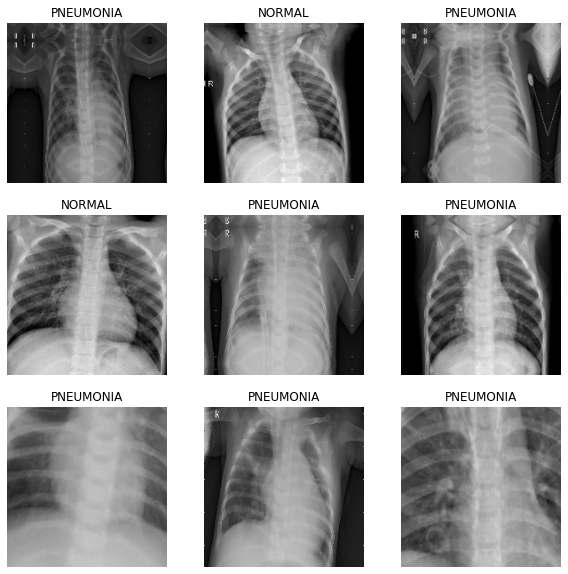

In [184]:
dt_augm_zoom = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.5)
])


plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_zoom(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for the better performance

In [185]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
"""# Before normalizing layer
image_batch, labels_batch = next(iter(dt_train))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

normalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) 
normalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))

# After nomarlizing layer
image_batch, labels_batch = next(iter(normalized_dt))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))"""

'# Before normalizing layer\nimage_batch, labels_batch = next(iter(dt_train))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))\n\nnormalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) \nnormalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))\n\n# After nomarlizing layer\nimage_batch, labels_batch = next(iter(normalized_dt))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))'

# Experimental Designs

## Define a function to build a model(without Dropout)

### No Dropout & Data Augmentation(RandomFlip, RandomRotation, RandomZoom)

In [186]:
def build_model(dt_train, dt_augms):
  model = Sequential()
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

  if dt_augms == {'randomflip'}:
    print('RandomFlip')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomrotation'}:
    print('RandomRotation')
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomzoom'}:
    print('RandomZoom')
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomflip', 'randomrotation'}:
    print('RandomFlip & RandomRotation')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomflip', 'randomzoom'}:
    print('RandomFlip & RandomZoom')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomrotation', 'randomzoom'}:
    print('RandomRotation & RandomZoom')
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
  elif dt_augms == {'randomflip', 'randomrotation', 'randomzoom'}:
    print('RandomFlip & RandomRotation & RandomZoom')
    model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)))
    model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
       
  model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_class, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  
  return model

### 1.Apply one augmentation:

#### 1-1 RandomFlip

##### Build a model

In [187]:
dt_augms = {'randomflip'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomFlip
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_27 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 11, 11

##### Train the model

In [188]:
epochs=10

model_cnn = model.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 37s 267ms/step - loss: 1.3704 - accuracy: 0.7767 - val_loss: 0.1515 - val_accuracy: 0.9379
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1295 - accuracy: 0.9507 - val_loss: 0.0984 - val_accuracy: 0.9618
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0786 - accuracy: 0.9700 - val_loss: 0.0684 - val_accuracy: 0.9723
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0577 - accuracy: 0.9792 - val_loss: 0.1307 - val_accuracy: 0.9503
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0620 - accuracy: 0.9720 - val_loss: 0.0861 - val_accuracy: 0.9694
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0550 - accuracy: 0.9780 - val_loss: 0.0949 - val_accuracy: 0.9694
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0435 - accuracy: 0.9845 - val_loss: 0.0681 - val_accuracy: 0.9723
Epo

##### Plot the evaluation

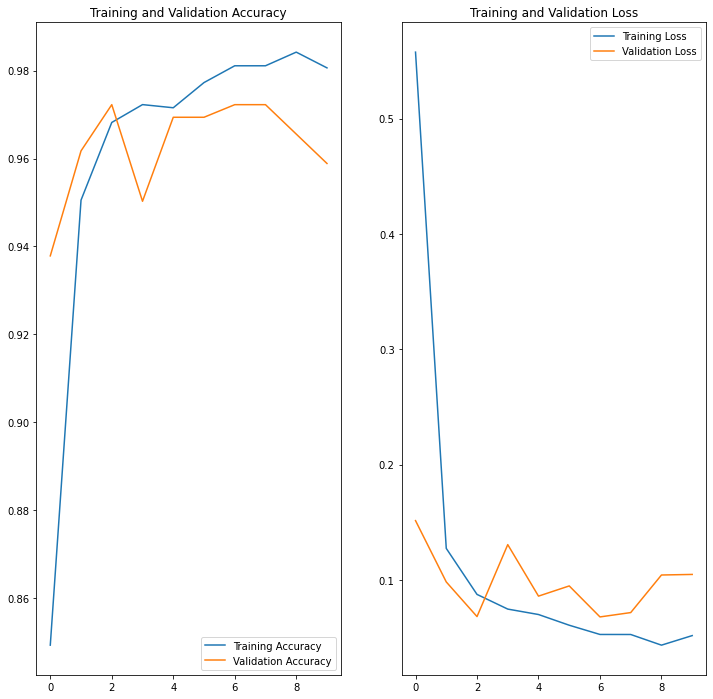

In [189]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 1-2 RandomRotation

##### Build a model

In [190]:
dt_augms = {'randomrotation'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomRotation
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_21 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_146 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_147 (MaxPoolin (None, 11

##### Train the model

In [191]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 9ms/step - loss: 0.9478 - accuracy: 0.7578 - val_loss: 0.1531 - val_accuracy: 0.9436
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1917 - accuracy: 0.9150 - val_loss: 0.1495 - val_accuracy: 0.9474
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1589 - accuracy: 0.9403 - val_loss: 0.0973 - val_accuracy: 0.9646
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1308 - accuracy: 0.9514 - val_loss: 0.1029 - val_accuracy: 0.9627
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1130 - accuracy: 0.9574 - val_loss: 0.1489 - val_accuracy: 0.9474
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1192 - accuracy: 0.9536 - val_loss: 0.0843 - val_accuracy: 0.9732
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1079 - accuracy: 0.9600 - val_loss: 0.0726 - val_accuracy: 0.9761
Epoch 

131/131 [==============================] - 1s 9ms/step - loss: 0.0976 - accuracy: 0.9645 - val_loss: 0.0594 - val_accuracy: 0.9818

##### Plot the evaluation

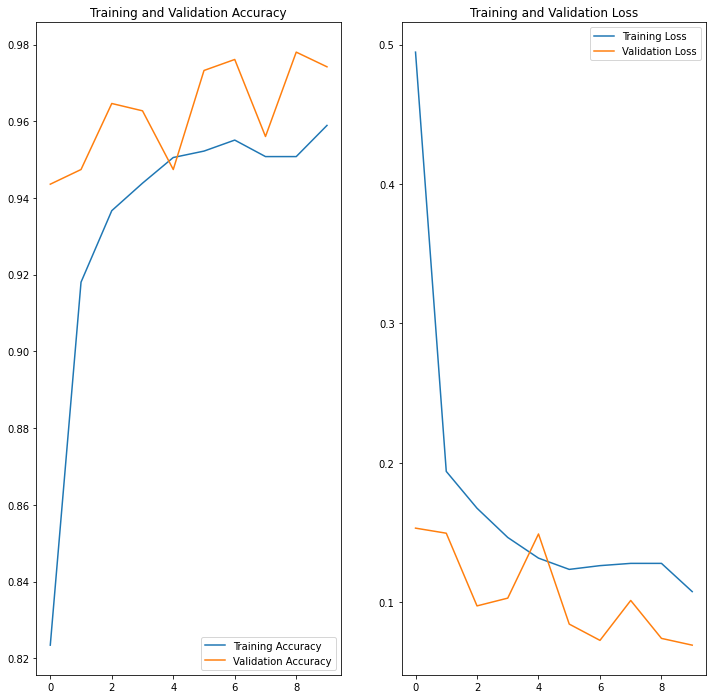

In [192]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 1-3 RandomZoom 

##### Build a model

In [193]:
dt_augms = {'randomzoom'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomZoom
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_20 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_152 (MaxPoolin (None, 11, 11

Train the model

In [194]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 9ms/step - loss: 1.8211 - accuracy: 0.7511 - val_loss: 0.0832 - val_accuracy: 0.9665
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1325 - accuracy: 0.9485 - val_loss: 0.0808 - val_accuracy: 0.9656
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0961 - accuracy: 0.9630 - val_loss: 0.0726 - val_accuracy: 0.9742
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0881 - accuracy: 0.9657 - val_loss: 0.0711 - val_accuracy: 0.9742
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0772 - accuracy: 0.9669 - val_loss: 0.0502 - val_accuracy: 0.9761
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0718 - accuracy: 0.9734 - val_loss: 0.0789 - val_accuracy: 0.9732
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0729 - accuracy: 0.9732 - val_loss: 0.1090 - val_accuracy: 0.9627
Epoch 

Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0931 - accuracy: 0.9633 - val_loss: 0.0475 - val_accuracy: 0.9799

##### Plot the evaluation

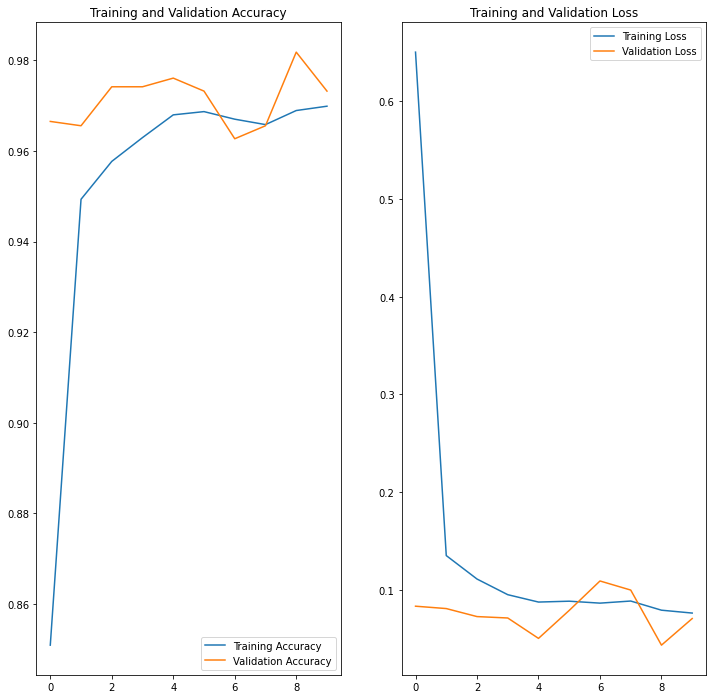

In [195]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2.Apply two augmentations

#### 2-1 RandomFlip & RandomRotation

##### Build a model

In [196]:
dt_augms = {'randomflip', 'randomrotation'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomFlip & RandomRotation
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_28 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_22 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_156 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_157 (Conv2D)      

##### Train the model

In [197]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.6775 - accuracy: 0.7074 - val_loss: 0.1495 - val_accuracy: 0.9426
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2122 - accuracy: 0.9126 - val_loss: 0.1087 - val_accuracy: 0.9637
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1520 - accuracy: 0.9401 - val_loss: 0.1503 - val_accuracy: 0.9426
Epoch 4/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1486 - accuracy: 0.9445 - val_loss: 0.0933 - val_accuracy: 0.9656
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1487 - accuracy: 0.9426 - val_loss: 0.1063 - val_accuracy: 0.9579
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1135 - accuracy: 0.9563 - val_loss: 0.1120 - val_accuracy: 0.9560
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1244 - accuracy: 0.9578 - val_loss: 0.1399 - val_accuracy: 0.9446
Epoc

Epoch 8/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1295 - accuracy: 0.9530 - val_loss: 0.0776 - val_accuracy: 0.9751

##### Plot the evaluation

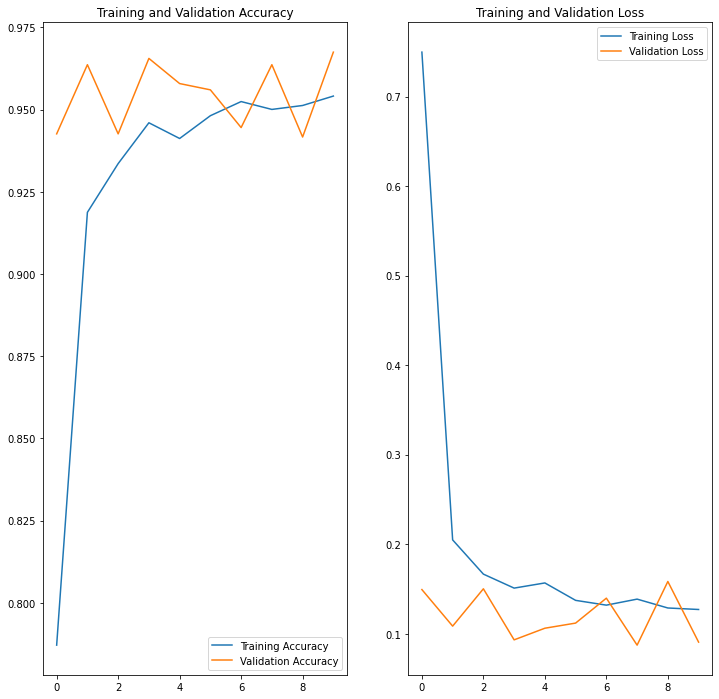

In [198]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 2-2 RandomFlip & RandomZoom

##### Build a model

In [199]:
dt_augms = {'randomflip', 'randomzoom'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomFlip & RandomZoom
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_29 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_21 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_161 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          

##### Train the model

In [200]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 0.8471 - accuracy: 0.7676 - val_loss: 0.1083 - val_accuracy: 0.9627
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1347 - accuracy: 0.9458 - val_loss: 0.1623 - val_accuracy: 0.9379
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0964 - accuracy: 0.9617 - val_loss: 0.1040 - val_accuracy: 0.9637
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0940 - accuracy: 0.9672 - val_loss: 0.1094 - val_accuracy: 0.9646
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0859 - accuracy: 0.9655 - val_loss: 0.0885 - val_accuracy: 0.9713
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0867 - accuracy: 0.9695 - val_loss: 0.0714 - val_accuracy: 0.9732
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.0855 - accuracy: 0.9662 - val_loss: 0.0615 - val_accuracy: 0.9751
Epoch

Epoch 10/10
131/131 [==============================] - 1s 9ms/step - loss: 0.0823 - accuracy: 0.9657 - val_loss: 0.0551 - val_accuracy: 0.9790

##### Plot the evaluation

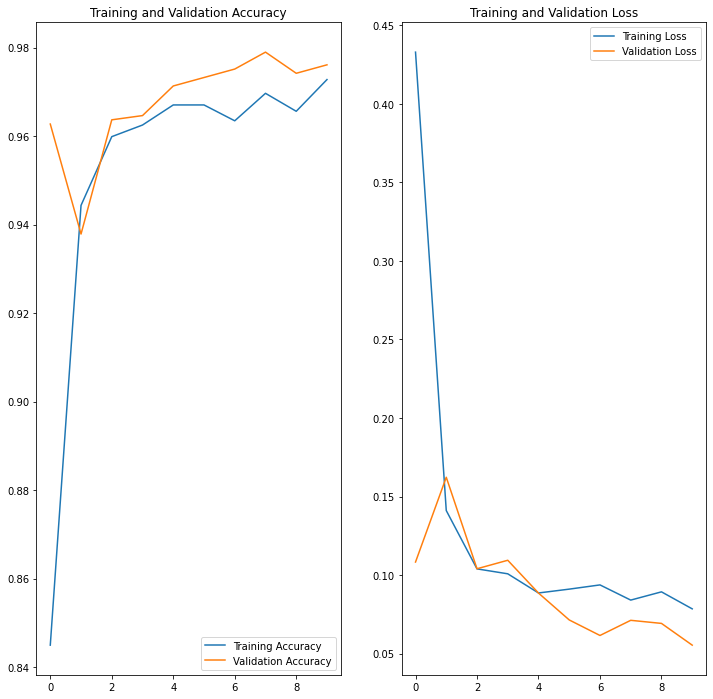

In [201]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 2-3 RandomRotation & RotationZoom

##### Build a model

In [202]:
dt_augms = {'randomrotation', 'randomzoom'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomRotation & RandomZoom
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_23 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_22 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_165 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_166 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_167 (Conv2D)      

##### Train the model

In [203]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.3608 - accuracy: 0.7422 - val_loss: 0.2215 - val_accuracy: 0.9302
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2273 - accuracy: 0.9009 - val_loss: 0.2009 - val_accuracy: 0.9226
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1654 - accuracy: 0.9358 - val_loss: 0.1333 - val_accuracy: 0.9474
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1467 - accuracy: 0.9406 - val_loss: 0.0886 - val_accuracy: 0.9627
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1191 - accuracy: 0.9530 - val_loss: 0.0954 - val_accuracy: 0.9618
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1208 - accuracy: 0.9580 - val_loss: 0.1263 - val_accuracy: 0.9522
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1472 - accuracy: 0.9440 - val_loss: 0.0872 - val_accuracy: 0.9637
Epoch

Epoch 9/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1201 - accuracy: 0.9590 - val_loss: 0.0840 - val_accuracy: 0.9713

##### Plot the evaluation

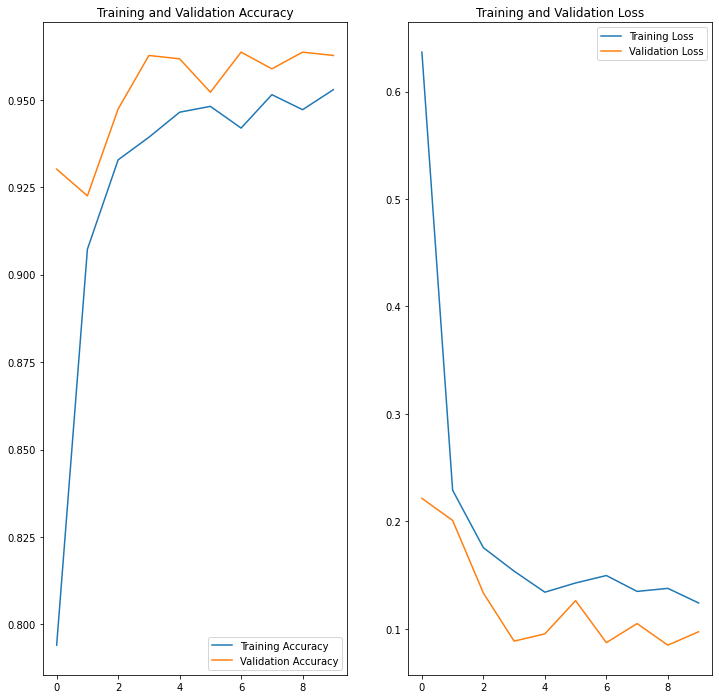

In [204]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 3.Apply all three augmentations

#### 3-1 RandomFlip & RandomRotation & RandomZoom

##### Build a model

In [205]:
dt_augms = {'randomflip', 'randomrotation', 'randomzoom'}
model = build_model(dt_train, dt_augms)
model.summary()

RandomFlip & RandomRotation & RandomZoom
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_30 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_24 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_23 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_170 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2

##### Train the model

In [206]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.8043 - accuracy: 0.7380 - val_loss: 0.1671 - val_accuracy: 0.9474
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2149 - accuracy: 0.9101 - val_loss: 0.1208 - val_accuracy: 0.9493
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1846 - accuracy: 0.9300 - val_loss: 0.1239 - val_accuracy: 0.9579
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1603 - accuracy: 0.9367 - val_loss: 0.1032 - val_accuracy: 0.9685
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1420 - accuracy: 0.9431 - val_loss: 0.1363 - val_accuracy: 0.9532
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1395 - accuracy: 0.9432 - val_loss: 0.1158 - val_accuracy: 0.9560
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1343 - accuracy: 0.9473 - val_loss: 0.1398 - val_accuracy: 0.9446
Epoch

Epoch 9/10
131/131 [==============================] - 1s 10ms/step - loss: 0.1364 - accuracy: 0.9469 - val_loss: 0.0842 - val_accuracy: 0.9723

##### Plot the evaluation

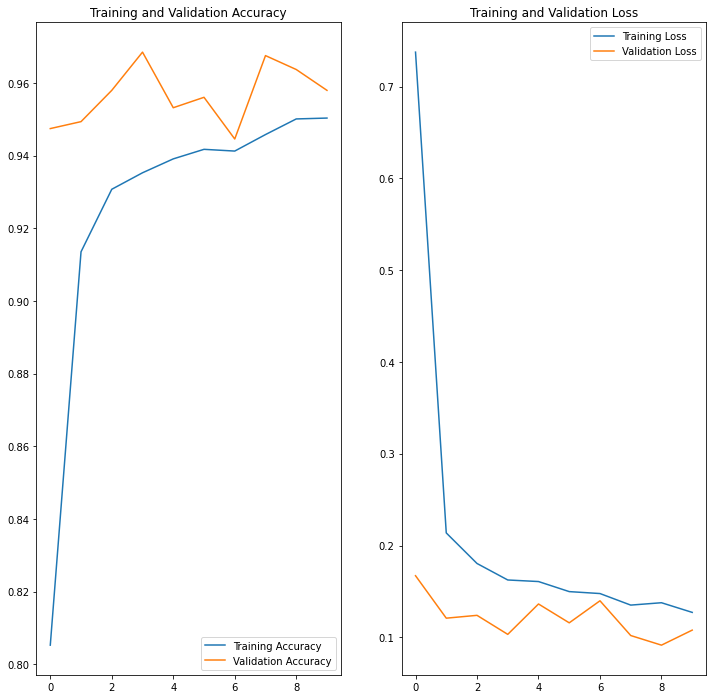

In [207]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Define a function to build a model(with Dropout)

### Dropout & Data Augmentation(Only Random Rotation)

### 1.Apply one augmentation and Dropout

#### 1-1 RandomRotation & Dropout

In [208]:
def build_model_dropout_randomrotation(dt_train):

  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')
  ])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

##### Build a model

In [209]:
model = build_model_dropout_randomrotation(dt_train)
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_25 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_175 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_176 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 11, 11, 64)      

##### Train the model

In [210]:
epochs=10

model_cnn = model.fit(
  dt_train,
  validation_data=dt_val,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 2s 10ms/step - loss: 1.8499 - accuracy: 0.6832 - val_loss: 0.5271 - val_accuracy: 0.7734
Epoch 2/10
131/131 [==============================] - 1s 8ms/step - loss: 0.4976 - accuracy: 0.7711 - val_loss: 0.2772 - val_accuracy: 0.8604
Epoch 3/10
131/131 [==============================] - 1s 8ms/step - loss: 0.3274 - accuracy: 0.8520 - val_loss: 0.2079 - val_accuracy: 0.9054
Epoch 4/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2730 - accuracy: 0.8841 - val_loss: 0.1297 - val_accuracy: 0.9436
Epoch 5/10
131/131 [==============================] - 1s 8ms/step - loss: 0.2184 - accuracy: 0.9158 - val_loss: 0.1109 - val_accuracy: 0.9570
Epoch 6/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1876 - accuracy: 0.9346 - val_loss: 0.1027 - val_accuracy: 0.9551
Epoch 7/10
131/131 [==============================] - 1s 8ms/step - loss: 0.1694 - accuracy: 0.9354 - val_loss: 0.1142 - val_accuracy: 0.9493
Epoch

##### Plot the evaluation

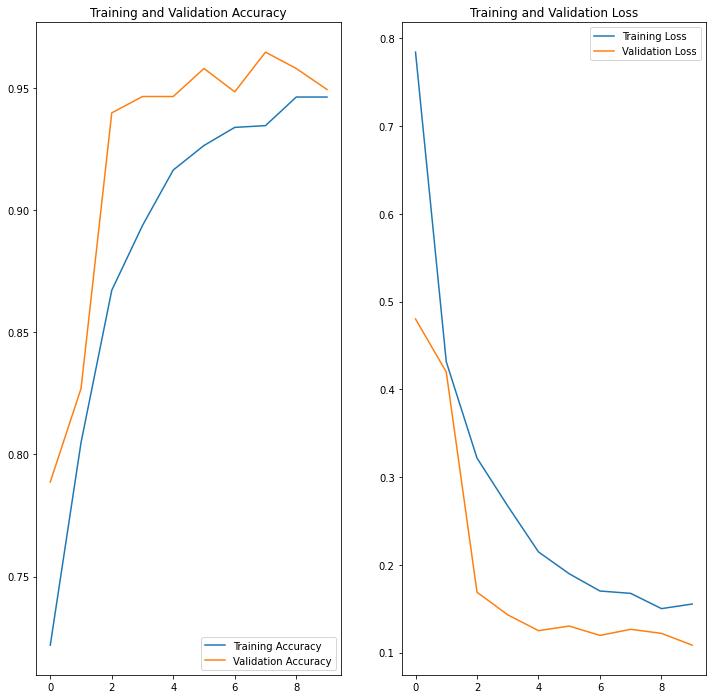

In [54]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()